In [2]:
import sys
from pathlib import Path

# Add /app to PYTHONPATH
project_root = Path("/app")
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

sys.path


['/usr/local/lib/python312.zip',
 '/usr/local/lib/python3.12',
 '/usr/local/lib/python3.12/lib-dynload',
 '',
 '/usr/local/lib/python3.12/site-packages',
 '/app']

In [3]:
import pandas as pd
from database.mongo_client import get_db

db = get_db()
runs = list(db.pipeline_runs.find())
df = pd.json_normalize(runs)

df.head()


,_id,started_at,status,finished_at,steps.fake_ingestion.status,steps.fake_ingestion.started_at,steps.fake_ingestion.duration_sec,steps.fake_ingestion.finished_at,steps.fake_ingestion.metrics.inserted,steps.csv_ingestion.status,...,steps.category_aggregation.duration_sec,steps.category_aggregation.finished_at,steps.category_aggregation.metrics.rows,steps.monthly_aggregation.status,steps.monthly_aggregation.started_at,steps.monthly_aggregation.duration_sec,steps.monthly_aggregation.finished_at,steps.monthly_aggregation.metrics.rows,metrics.total_inserted,metrics.total_rejected
0,e4203c2d-4a61-427d-af46-47fb77824e76,2026-01-07 03:04:34.192,success,2026-01-07 03:04:42.274,success,2026-01-07 03:04:34.778,1.283394,2026-01-07 03:04:36.061,100,success,...,1.179608,2026-01-07 03:04:39.918,6,success,2026-01-07 03:04:40.502,1.184795,2026-01-07 03:04:41.686,3,106,5
1,5ba43c38-18f3-4f05-8b9f-42d1c24135db,2026-01-07 03:04:46.426,success,2026-01-07 03:04:54.464,success,2026-01-07 03:04:47.023,1.230381,2026-01-07 03:04:48.253,100,success,...,1.178516,2026-01-07 03:04:52.076,6,success,2026-01-07 03:04:52.660,1.214452,2026-01-07 03:04:53.874,3,106,5


<Axes: title={'center': 'Pipeline Runs: Success vs Failure'}, xlabel='status'>

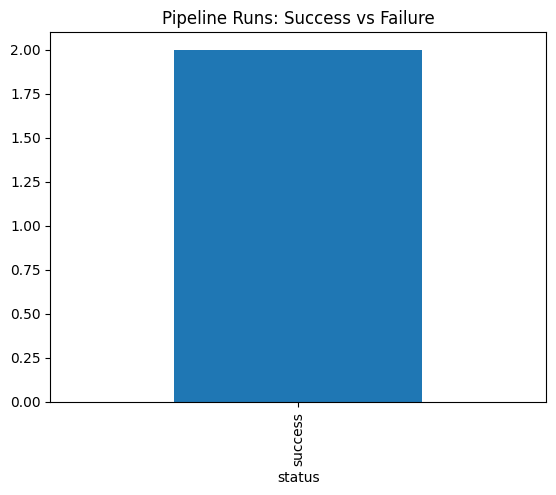

In [4]:
df["status"].value_counts().plot(
    kind="bar",
    title="Pipeline Runs: Success vs Failure"
)


<Axes: title={'center': 'Pipeline Duration Over Time'}, xlabel='started_at'>

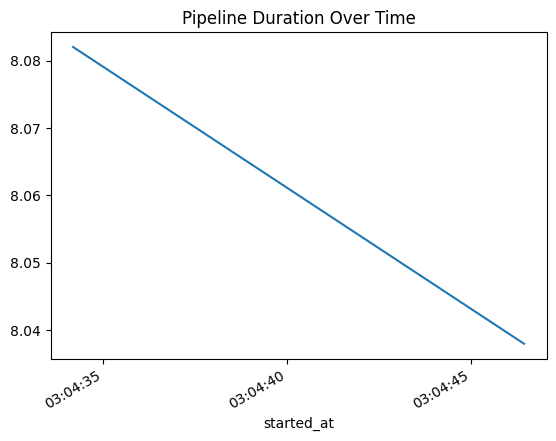

In [5]:
df["duration_sec"] = (
    pd.to_datetime(df["finished_at"]) -
    pd.to_datetime(df["started_at"])
).dt.total_seconds()

df.plot(
    x="started_at",
    y="duration_sec",
    kind="line",
    title="Pipeline Duration Over Time",
    legend=False
)


<Axes: title={'center': 'Average Step Duration (seconds)'}>

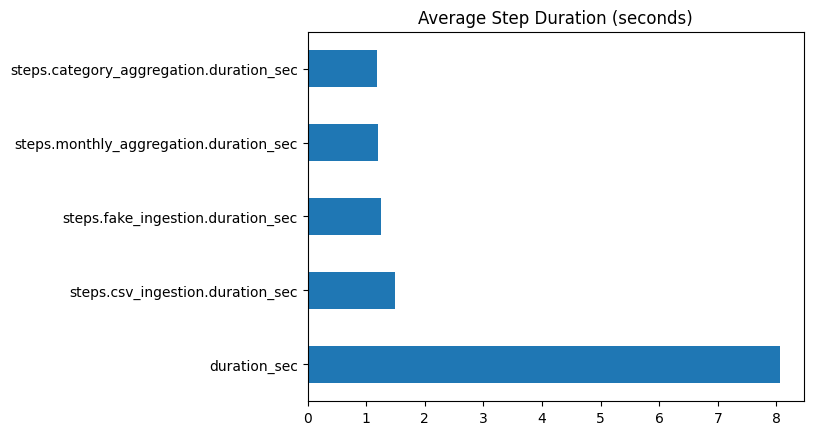

In [6]:
step_cols = [c for c in df.columns if c.endswith("duration_sec")]
step_durations = df[step_cols].mean().sort_values(ascending=False)

step_durations.plot(
    kind="barh",
    title="Average Step Duration (seconds)"
)


<Axes: title={'center': 'Inserted vs Rejected Records per Run'}>

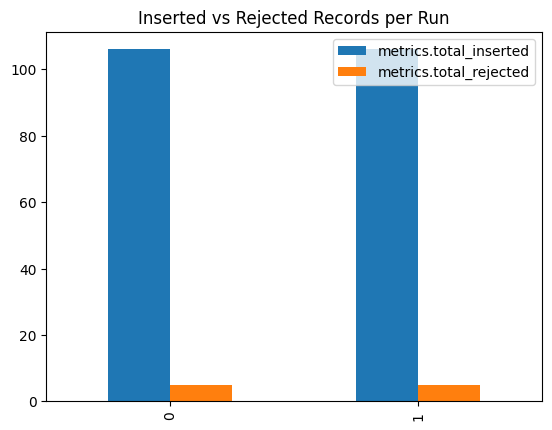

In [7]:
df[[
    "metrics.total_inserted",
    "metrics.total_rejected"
]].plot(
    kind="bar",
    title="Inserted vs Rejected Records per Run"
)


In [8]:
df[df["status"] == "failed"][[
    "_id", "error", "started_at"
]]


KeyError: "['error'] not in index"